In [1]:
import pandas as pd;
%matplotlib inline
import glob;
import numpy as np
import re;
import matplotlib.pyplot as plt

In [2]:
fig_path='../../../TeX/Rus/figures/'

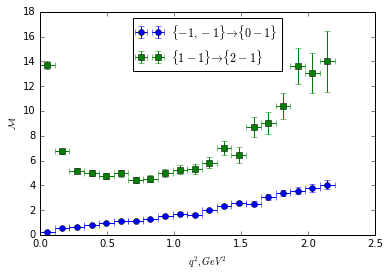

In [3]:
# Q2 histograms
hQ2_1=np.loadtxt('../build/partonic/hQ2_1.hst')
hQ2_15=np.loadtxt('../build/partonic/hQ2_15.hst')
scale1=1e-4;
scale15=-1e-4;
plt.errorbar(hQ2_1[:,0],scale1*hQ2_1[:,1],fmt='o',label=r'$\{-1, -1\}\to \{0 -1\}$',
             xerr=hQ2_1[:,2],yerr=scale1*hQ2_1[:,3]);
plt.errorbar(hQ2_15[:,0],scale15*hQ2_15[:,1],fmt='s',label=r'$\{1 -1\}\to \{2 -1\}$',
             xerr=hQ2_15[:,2],yerr=scale15*hQ2_15[:,3])
plt.legend(loc='best')
plt.xlabel(r'$q^2, GeV^2$')
plt.ylabel(r'$\mathcal{M}$')
#plt.yscale('log')
#plt.savefig(fig_path+'hq2.pdf')

In [4]:
def plot_with_rarios(dat1,dat2, label1=r'$\Delta=0$', label2=r'$\Delta=0.4$ MeV'):
    f,(ax1,ax2) = plt.subplots(2,sharex=True, sharey=False)
    ax1.plot(dat1[:,0],dat1[:,1],'--',label=label1)
    ax1.plot(dat2[:,0],dat2[:,1],'k-',label=label2)
    ax1.legend(loc='best')
    #ax1.set_yticks(list(np.linspace(0,600,5)))
    #
    ax2.plot(dat1[:,0],dat2[:,1]/dat1[:,1])
    ax2.set_ylim([0,2])
    ax2.set_yticks([0,0.5,1,1.5])
    ax2.set_ylabel('ratio')
    ax2.grid()
    #
    f.subplots_adjust(hspace=0.03)
    return f,(ax1,ax2)


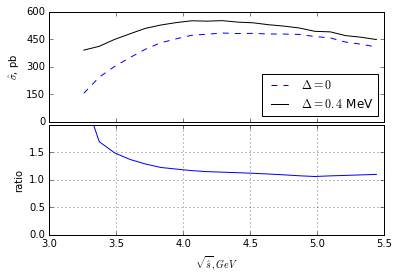

In [5]:
hEn_001=np.loadtxt("../build/partonic/hEn_001.hst")
hEn_04=np.loadtxt("../build/partonic/hEn_04.hst")
f, (ax1, ax2)=plot_with_rarios(hEn_001,hEn_04)
ax1.set_yticks(list(np.linspace(0,600,5)))
ax1.set_ylabel(r'$\hat\sigma$, pb')
ax2.set_xlabel(r'$\sqrt{\hat{s}}, GeV$')
plt.savefig(fig_path+'partonic_en.pdf')

In [6]:
def parse_fileName(fileName):
    name=fileName.split("/")[-1]
    fields=name.split("_")
    var=fields[0]
    ecm=float(fields[1][1::])
    delta=float(fields[2][1::])
    alpha=float(fields[3][1::])
    pdfSet=fields[4][0:-4]
    data=np.loadtxt(fileName)
    return {'var': var, 'ecm': ecm, 'delta': delta,'alpha': alpha,'pdf':pdfSet,'data':data}
    
    

In [7]:
def create_data():
    return pd.DataFrame(columns=['var','ecm','delta','alpha','pdf','data'])

In [8]:
def load_data(data, fileName):
    row=len(data.index)
    di=parse_fileName(fileName)
    for key in di.keys():
        data.loc[row,key]=di[key] 

In [9]:
def select_data(data, di, othdi={}):
    di.update(othdi)
    return data[(data[list(di)] == pd.Series(di)).all(axis=1)]


In [10]:
def load_all_data(path):
    data=create_data()
    for file in glob.glob(path+'*.hst'):
        load_data(data,file)
    return data

In [11]:
def get_xy_data(data,crit):
    return list(select_data(data,crit)['data'])[0]

In [46]:
data=load_all_data('../build/A/')
data

,var,ecm,delta,alpha,pdf,data
0,m,11,0.01,3,CT10,"[[3.149072, 0.3048123, 0.0004834373], [3.24399..."
1,m,11,0.4,3,CT10,"[[3.149072, 63.57805, 0.6185213], [3.243992, 1..."
2,pT2,11,0.01,3,CT10,"[[0.1265795, 2.229284, 0.002011922], [0.379738..."
3,pT2,11,0.4,3,CT10,"[[0.1265795, 26.93373, 0.231925], [0.3797386, ..."
4,xF,11,0.01,3,CT10,"[[-1.9, 0.01948345, 8.952283e-05], [-1.7, 0.04..."
5,xF,11,0.4,3,CT10,"[[-1.9, 0.5286899, 0.02453728], [-1.7, 0.79953..."
6,yPsi,11,0.01,3,CT10,"[[-0.95, 0.0505553, 0.0002083934], [-0.85, 0.1..."
7,yPsi,11,0.4,3,CT10,"[[-0.95, 0.7677037, 0.02970993], [-0.85, 1.558..."


In [58]:
data=load_all_data('../build/B/')
data

,var,ecm,delta,alpha,pdf,data
0,m,11,0.01,3,CT10,"[[3.200115, 0.5680207, 0.01853215], [3.201015,..."
1,m,11,0.4,3,CT10,"[[3.200115, 1.630237, 0.05283594], [3.201015, ..."
2,pT2,11,0.01,3,CT10,"[[0.1003065, 1.967568, 0.04169355], [0.1027565..."
3,pT2,11,0.4,3,CT10,"[[0.1003065, 2.584206, 0.05338433], [0.1027565..."
4,xF,11,0.01,3,CT10,"[[0.05, 0.4513, 0.001486986], [0.15, 0.4452346..."
5,xF,11,0.4,3,CT10,"[[0.05, 2.751056, 0.1263697], [0.15, 2.737849,..."
6,yPsi,11,0.01,3,CT10,"[[-0.95, 0.05039855, 0.0002078992], [-0.85, 0...."
7,yPsi,11,0.4,3,CT10,"[[-0.95, 0.8452706, 0.03226855], [-0.85, 1.457..."


In [68]:
def get_x_label(var):
    if var=='m':
        return r'$m$, GeV'
    elif var=='xF':
        return r'$x_F$'
    elif var=='pT2':
        return r'$p_T^2,\ \mathrm{GeV^2}$'
    elif var=='yPsi':
        return r'$y_\psi$'
    else:
        return '??'

In [71]:
def get_y_label(var):
    if var=='m':
        return r'$d\sigma/dm$, pb/GeV'
    elif var=='xF':
        return r'$d\sigma/dx_F$, pb'
    elif var=='pT2':
        return r'$d\sigma/dp_T^2,\ \mathrm{pb/GeV^2}$'
    elif var=='yPsi':
        return r'$d\sigma/dy_\psi\ \mathrm{pb}$'
    else:
        return '???'

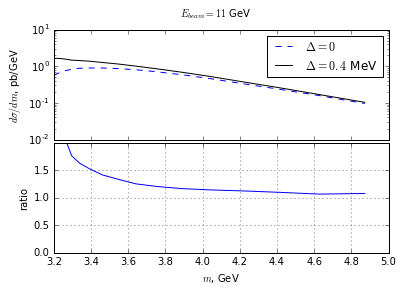

In [61]:
var='m'
ecm=11
pdf='CT10'
tab001=get_xy_data(data,{'var':var,'ecm':ecm,'pdf':pdf,'delta':0.01})
tab04=get_xy_data(data,{'var':var,'ecm':ecm,'pdf':pdf,'delta':0.4})
f,(ax1,ax2)=plot_with_rarios(tab001,tab04)
ax1.set_ylabel(get_y_label(var))
ax2.set_xlabel(get_x_label(var))
ax1.set_yscale('log')
plt.suptitle(r'$E_{beam}=%2.0f$ GeV'%ecm)

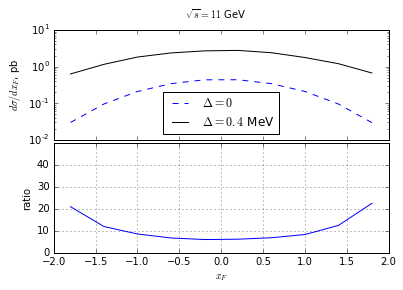

In [20]:
var='xF'
ecm=11
pdf='CT10'
tab001=get_xy_data(data,{'var':var,'ecm':ecm,'pdf':pdf,'delta':0.01})
tab04=get_xy_data(data,{'var':var,'ecm':ecm,'pdf':pdf,'delta':0.4})
f,(ax1,ax2)=plot_with_rarios(tab001,tab04)
ax1.set_ylabel(get_y_label(var))
ax2.set_xlabel(get_x_label(var))
ax1.set_yscale('log')
ax2.set_ylim([0,50])
ax2.set_yticks([0,10,20,30,40])
plt.suptitle(r'$\sqrt{s}=%2.0f$ GeV'%ecm)

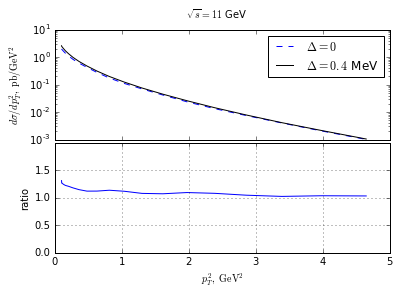

In [62]:
var='pT2'
ecm=11
pdf='CT10'
tab001=get_xy_data(data,{'var':var,'ecm':ecm,'pdf':pdf,'delta':0.01})
tab04=get_xy_data(data,{'var':var,'ecm':ecm,'pdf':pdf,'delta':0.4})
f,(ax1,ax2)=plot_with_rarios(tab001,tab04)
ax1.set_ylabel(get_y_label(var))
ax2.set_xlabel(get_x_label(var))
ax1.set_yscale('log')
plt.suptitle(r'$\sqrt{s}=%2.0f$ GeV'%ecm)

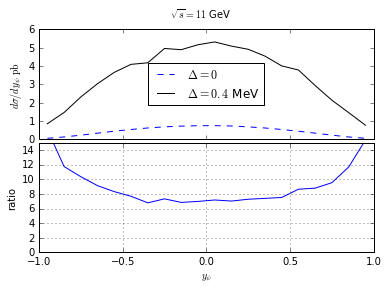

In [72]:
var='yPsi'
ecm=11
pdf='CT10'
tab001=get_xy_data(data,{'var':var,'ecm':ecm,'pdf':pdf,'delta':0.01})
tab04=get_xy_data(data,{'var':var,'ecm':ecm,'pdf':pdf,'delta':0.4})
f,(ax1,ax2)=plot_with_rarios(tab001,tab04)
ax1.set_ylabel(get_y_label(var))
ax2.set_xlabel(get_x_label(var))
#ax1.set_yscale('log')
ax2.set_ylim([0,15])
ax2.set_yticks([0,5,10])
ax2.set_yscale('linear')
plt.suptitle(r'$\sqrt{s}=%2.0f$ GeV'%ecm)

<Container object of 3 artists>

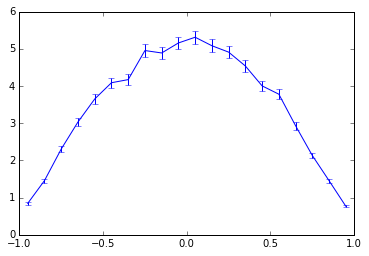

In [73]:
plt.errorbar(tab04[:,0],tab04[:,1],yerr=tab04[:,2])